In [1]:
!pip install tpot -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 967.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## Data Loading

In [3]:
df = pd.read_csv('data_HC.csv')

In [4]:
df.head()

,Motor_Ship,Type_of_Load,Docking_Day,Docking_Time,Sailing_Day,Departure_Time,Permanence,Motor_Ship.1,Year_of_Construct,IMO,...,Energy_AE_Hotelling,ME_Cruising,ME_Maniobra,AE_Cruising,AE_Maniobra,AE_Hotelling,Caldera_Maniobra,Caldera_Hotelling,Subtotal_NoCald,Total
0,CAP PORTLAND,CONTENEDORES,1/1/2018,10:10:00 PM,1/2/2018,4:50:00 AM,6:40:00 AM,CAP PORTLAND,2007.0,9344631,...,10834.911700,0.00000,26714.341620,5818.061720,484.838477,4333.964679,327.861771,18317,37351.20649,37691.78854
1,HANSA AUGSBURG,CONTENEDORES,1/2/2018,4:10:00 PM,1/3/2018,1:00:00 AM,8:50:00 AM,HANSA AUGSBURG,2008.0,9373474,...,11815.677980,72652.90671,18711.021160,4537.753741,378.146145,4726.271190,327.861771,24270,101006.09900,101350.81510
2,HOHEBANK,CONTENEDORES,1/3/2018,9:45:00 AM,1/3/2018,3:10:00 PM,5:25:00 AM,HOHEBANK,2007.0,9435818,...,4270.957685,53297.42825,8989.314557,3499.295079,291.607923,1708.383074,327.861771,14882,67786.02888,68124.22588
3,ULTRA CORY,GRANEL,1/1/2018,11:40:00 AM,1/5/2018,6:25:00 PM,6:45:00 AM,ULTRA CORY,2014.0,9675743,...,81570.305450,74674.34424,9074.873893,4322.585182,360.215432,32628.122180,85.529158,73647,121060.14090,121196.81390
4,MAERSK WAKAMATSU,CONTENEDORES,1/5/2018,2:00:00 PM,1/6/2018,12:05:00 AM,10:05:00 AM,MAERSK WAKAMATSU,2010.0,9550345,...,12813.363960,108664.30650,10406.430970,7695.122259,641.260188,5125.345586,327.861771,27704,132532.46550,132879.56670


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Motor_Ship            651 non-null    object 
 1   Type_of_Load          651 non-null    object 
 2   Docking_Day           651 non-null    object 
 3   Docking_Time          651 non-null    object 
 4   Sailing_Day           651 non-null    object 
 5   Departure_Time        651 non-null    object 
 6   Permanence            651 non-null    object 
 7   Motor_Ship.1          651 non-null    object 
 8   Year_of_Construct     650 non-null    float64
 9   IMO                   608 non-null    object 
 10  Max_Speed             651 non-null    float64
 11  Avg_Speed             651 non-null    float64
 12  Gross_tonnage         651 non-null    int64  
 13  Dead_Weight           608 non-null    float64
 14  EM_Fuel               651 non-null    object 
 15  AE_Fuel               6

In [6]:
df.describe()

,Year_of_Construct,Max_Speed,Avg_Speed,Gross_tonnage,Dead_Weight,Power_ME,LF_ME_Cruising,A_ME,Power_AE,LF_ME_Maniobra,...,Energy_AE_Hotelling,ME_Cruising,ME_Maniobra,AE_Cruising,AE_Maniobra,AE_Hotelling,Caldera_Maniobra,Caldera_Hotelling,Subtotal_NoCald,Total
count,650.000000,651.000000,651.000000,651.000000,608.000000,651.000000,650.000000,651.0,651.000000,651.000000,...,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,2003.761538,12.816283,11.125868,15141.519201,23360.042763,12523.466192,0.671250,1.0,2755.190028,0.171910,...,54509.056186,91001.479189,13153.420702,6876.121326,573.010110,21803.622474,234.612973,47298.298003,133407.653800,133675.113161
std,14.620523,3.815032,3.635131,9230.265925,15878.335000,6932.278160,0.185008,0.0,1525.087137,0.163676,...,90896.566558,73953.443467,9301.516389,4703.399438,391.949953,36358.626622,117.429999,30804.152959,115782.905681,115736.081285
min,1960.000000,5.600000,5.200000,287.000000,640.000000,405.405099,0.231515,1.0,89.189122,0.016350,...,50.540502,0.000000,175.942999,321.055154,26.754596,20.216201,85.529158,495.000000,3527.844425,3653.378320
25%,2005.250000,9.400000,7.800000,9994.000000,11846.000000,8956.534028,0.533926,1.0,1970.867358,0.046544,...,8284.736809,48736.220670,7748.432599,3420.686133,285.057178,3313.894723,88.768898,28162.000000,68114.564085,68454.748630
50%,2008.000000,12.800000,10.700000,17280.000000,21440.000000,14440.304990,0.712920,1.0,3176.867099,0.102037,...,16095.416750,58917.199370,11512.088250,5923.583322,493.631943,6438.166702,327.861771,39839.000000,80633.647660,80986.790980
75%,2010.000000,15.700000,13.900000,19846.000000,28188.250000,16281.978920,0.815896,1.0,3582.035362,0.263406,...,41815.225775,127649.276850,18711.021160,9960.035953,830.002996,16726.090310,327.861771,60331.500000,180455.174500,180571.547650
max,2018.000000,21.400000,19.700000,36449.000000,63948.000000,27681.885680,0.961788,1.0,6090.014850,0.888996,...,702370.738900,507074.412400,87831.505440,27866.243180,2322.186931,280948.295500,327.861771,268055.000000,709777.805100,709910.454600


In [7]:
df.columns

Index(['Motor_Ship', 'Type_of_Load', 'Docking_Day', 'Docking_Time',
       'Sailing_Day', 'Departure_Time', 'Permanence', 'Motor_Ship.1',
       'Year_of_Construct', 'IMO', 'Max_Speed', 'Avg_Speed', 'Gross_tonnage',
       'Dead_Weight', 'EM_Fuel', 'AE_Fuel', 'Engine_Speed', 'Power_ME',
       'LF_ME_Cruising', 'A_ME', 'Power_AE', 'LF_ME_Maniobra',
       'T_min_Hotell_Formato', 'T_min_Hotell', 'Energy_ME_Cruising',
       'Energy_ME_Maniobra', 'Energy_AE_Cruising', 'Energy_AE_Maniobra',
       'Energy_AE_Hotelling', 'ME_Cruising', 'ME_Maniobra', 'AE_Cruising',
       'AE_Maniobra', 'AE_Hotelling', 'Caldera_Maniobra', 'Caldera_Hotelling',
       'Subtotal_NoCald', 'Total'],
      dtype='object')

## Handling Missing Values

In [8]:
df.dtypes

Motor_Ship               object
Type_of_Load             object
Docking_Day              object
Docking_Time             object
Sailing_Day              object
Departure_Time           object
Permanence               object
Motor_Ship.1             object
Year_of_Construct       float64
IMO                      object
Max_Speed               float64
Avg_Speed               float64
Gross_tonnage             int64
Dead_Weight             float64
EM_Fuel                  object
AE_Fuel                  object
Engine_Speed             object
Power_ME                float64
LF_ME_Cruising          float64
A_ME                      int64
Power_AE                float64
LF_ME_Maniobra          float64
T_min_Hotell_Formato      int64
T_min_Hotell            float64
Energy_ME_Cruising      float64
Energy_ME_Maniobra      float64
Energy_AE_Cruising      float64
Energy_AE_Maniobra      float64
Energy_AE_Hotelling     float64
ME_Cruising             float64
ME_Maniobra             float64
AE_Cruis

In [9]:
df.isna().sum()

Motor_Ship               0
Type_of_Load             0
Docking_Day              0
Docking_Time             0
Sailing_Day              0
Departure_Time           0
Permanence               0
Motor_Ship.1             0
Year_of_Construct        1
IMO                     43
Max_Speed                0
Avg_Speed                0
Gross_tonnage            0
Dead_Weight             43
EM_Fuel                  0
AE_Fuel                  0
Engine_Speed             0
Power_ME                 0
LF_ME_Cruising           1
A_ME                     0
Power_AE                 0
LF_ME_Maniobra           0
T_min_Hotell_Formato     0
T_min_Hotell             0
Energy_ME_Cruising       0
Energy_ME_Maniobra       0
Energy_AE_Cruising       0
Energy_AE_Maniobra       0
Energy_AE_Hotelling      0
ME_Cruising              0
ME_Maniobra              0
AE_Cruising              0
AE_Maniobra              0
AE_Hotelling             0
Caldera_Maniobra         0
Caldera_Hotelling        0
Subtotal_NoCald          0
T

In [10]:
df.isna().any()

Motor_Ship              False
Type_of_Load            False
Docking_Day             False
Docking_Time            False
Sailing_Day             False
Departure_Time          False
Permanence              False
Motor_Ship.1            False
Year_of_Construct        True
IMO                      True
Max_Speed               False
Avg_Speed               False
Gross_tonnage           False
Dead_Weight              True
EM_Fuel                 False
AE_Fuel                 False
Engine_Speed            False
Power_ME                False
LF_ME_Cruising           True
A_ME                    False
Power_AE                False
LF_ME_Maniobra          False
T_min_Hotell_Formato    False
T_min_Hotell            False
Energy_ME_Cruising      False
Energy_ME_Maniobra      False
Energy_AE_Cruising      False
Energy_AE_Maniobra      False
Energy_AE_Hotelling     False
ME_Cruising             False
ME_Maniobra             False
AE_Cruising             False
AE_Maniobra             False
AE_Hotelli

In [11]:
df[df.isna().any(axis=1)]

,Motor_Ship,Type_of_Load,Docking_Day,Docking_Time,Sailing_Day,Departure_Time,Permanence,Motor_Ship.1,Year_of_Construct,IMO,...,Energy_AE_Hotelling,ME_Cruising,ME_Maniobra,AE_Cruising,AE_Maniobra,AE_Hotelling,Caldera_Maniobra,Caldera_Hotelling,Subtotal_NoCald,Total
0,CAP PORTLAND,CONTENEDORES,1/1/2018,10:10:00 PM,1/2/2018,4:50:00 AM,6:40:00 AM,CAP PORTLAND,2007.0,9344631,...,10834.911700,0.000000,26714.341620,5818.061720,484.838477,4333.964679,327.861771,18317,37351.206490,37691.788540
22,BARCAZA MAG 13,GENERAL,1/16/2018,4:25:00 AM,1/16/2018,11:00:00 PM,6:35:00 PM,BARCAZA MAG 13,1960.0,NaN,...,662.972472,5590.173423,655.037744,345.014494,28.751208,265.188989,88.768898,13824,6884.165857,6982.534983
23,BARCAZA MAG 18,GENERAL,1/16/2018,4:25:00 AM,1/17/2018,1:30:00 AM,9:05:00 PM,BARCAZA MAG 18,1960.0,NaN,...,752.161593,5590.173423,655.037744,345.014494,28.751208,300.864637,88.768898,15684,6919.841506,7019.502142
27,BARCAZA MAG 21,GENERAL,1/16/2018,4:25:00 AM,1/17/2018,10:20:00 PM,5:55:00 PM,BARCAZA MAG 21,1960.0,NaN,...,1495.404274,5590.173423,655.037744,345.014494,28.751208,598.161710,88.768898,31182,7217.138578,7327.561802
82,CONDESA II,GENERAL,2/12/2018,11:00:00 AM,2/22/2018,7:00:00 AM,8:00:00 PM,CONDESA II,1960.0,NaN,...,8419.453092,5590.173423,655.037744,345.014494,28.751208,3367.781237,88.768898,175562,9986.758105,10197.445590
101,DARYA 1,GENERAL,3/1/2018,5:30:00 PM,3/4/2018,6:30:00 AM,1:00:00 PM,DARYA 1,1960.0,NaN,...,2176.214570,5590.173423,655.037744,345.014494,28.751208,870.485828,88.768898,45378,7489.462697,7609.744449
133,BARCAZA MAG 13,GENERAL,3/20/2018,7:50:00 PM,3/22/2018,6:35:00 AM,10:45:00 AM,BARCAZA MAG 13,1960.0,NaN,...,1239.728792,5590.173423,655.037744,345.014494,28.751208,495.891517,88.768898,25850,7114.868386,7221.589279
135,BARCAZA MAG 18,GENERAL,3/20/2018,7:50:00 PM,3/22/2018,10:30:00 AM,2:40:00 PM,BARCAZA MAG 18,1960.0,NaN,...,1379.458416,5590.173423,655.037744,345.014494,28.751208,551.783367,88.768898,28764,7170.760235,7279.504495
137,BARCAZA MAG 21,GENERAL,3/22/2018,8:05:00 AM,3/23/2018,1:00:00 AM,4:55:00 PM,BARCAZA MAG 21,1960.0,NaN,...,603.513057,5590.173423,655.037744,345.014494,28.751208,241.405223,88.768898,12584,6860.382091,6957.890210
138,BARCAZA MAG 25,GENERAL,3/22/2018,8:05:00 AM,3/23/2018,5:10:00 AM,9:05:00 PM,BARCAZA MAG 25,1960.0,NaN,...,752.161593,5590.173423,655.037744,345.014494,28.751208,300.864637,88.768898,15684,6919.841506,7019.502142


In [12]:
# Filling missing values for 'Year_of_Construct' with its mean
df['Year_of_Construct'].fillna(df['Year_of_Construct'].mean(), inplace=True)
df['LF_ME_Cruising'].fillna(df['LF_ME_Cruising'].mean(), inplace=True)
# Considering 'Dead_Weight' is a numerical column and crucial, fill with mean
df['Dead_Weight'].fillna(df['Dead_Weight'].mean(), inplace=True)

# 'IMO' is not crucial for analysis, consider dropping the column
df.drop('IMO', axis=1, inplace=True)



In [13]:
df.isna().sum()

Motor_Ship              0
Type_of_Load            0
Docking_Day             0
Docking_Time            0
Sailing_Day             0
Departure_Time          0
Permanence              0
Motor_Ship.1            0
Year_of_Construct       0
Max_Speed               0
Avg_Speed               0
Gross_tonnage           0
Dead_Weight             0
EM_Fuel                 0
AE_Fuel                 0
Engine_Speed            0
Power_ME                0
LF_ME_Cruising          0
A_ME                    0
Power_AE                0
LF_ME_Maniobra          0
T_min_Hotell_Formato    0
T_min_Hotell            0
Energy_ME_Cruising      0
Energy_ME_Maniobra      0
Energy_AE_Cruising      0
Energy_AE_Maniobra      0
Energy_AE_Hotelling     0
ME_Cruising             0
ME_Maniobra             0
AE_Cruising             0
AE_Maniobra             0
AE_Hotelling            0
Caldera_Maniobra        0
Caldera_Hotelling       0
Subtotal_NoCald         0
Total                   0
dtype: int64

## Encoding Categorical Variables

In [14]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['Motor_Ship']= label_encoder.fit_transform(df['Motor_Ship'])
df['Type_of_Load']= label_encoder.fit_transform(df['Type_of_Load'])
df['EM_Fuel']= label_encoder.fit_transform(df['EM_Fuel'])
df['AE_Fuel']= label_encoder.fit_transform(df['AE_Fuel'])
df['Engine_Speed']= label_encoder.fit_transform(df['Engine_Speed'])

In [15]:
df.head()

,Motor_Ship,Type_of_Load,Docking_Day,Docking_Time,Sailing_Day,Departure_Time,Permanence,Motor_Ship.1,Year_of_Construct,Max_Speed,...,Energy_AE_Hotelling,ME_Cruising,ME_Maniobra,AE_Cruising,AE_Maniobra,AE_Hotelling,Caldera_Maniobra,Caldera_Hotelling,Subtotal_NoCald,Total
0,43,1,1/1/2018,10:10:00 PM,1/2/2018,4:50:00 AM,6:40:00 AM,CAP PORTLAND,2007.0,20.6,...,10834.911700,0.00000,26714.341620,5818.061720,484.838477,4333.964679,327.861771,18317,37351.20649,37691.78854
1,91,1,1/2/2018,4:10:00 PM,1/3/2018,1:00:00 AM,8:50:00 AM,HANSA AUGSBURG,2008.0,20.2,...,11815.677980,72652.90671,18711.021160,4537.753741,378.146145,4726.271190,327.861771,24270,101006.09900,101350.81510
2,95,1,1/3/2018,9:45:00 AM,1/3/2018,3:10:00 PM,5:25:00 AM,HOHEBANK,2007.0,15.7,...,4270.957685,53297.42825,8989.314557,3499.295079,291.607923,1708.383074,327.861771,14882,67786.02888,68124.22588
3,216,3,1/1/2018,11:40:00 AM,1/5/2018,6:25:00 PM,6:45:00 AM,ULTRA CORY,2014.0,13.0,...,81570.305450,74674.34424,9074.873893,4322.585182,360.215432,32628.122180,85.529158,73647,121060.14090,121196.81390
4,118,1,1/5/2018,2:00:00 PM,1/6/2018,12:05:00 AM,10:05:00 AM,MAERSK WAKAMATSU,2010.0,11.8,...,12813.363960,108664.30650,10406.430970,7695.122259,641.260188,5125.345586,327.861771,27704,132532.46550,132879.56670


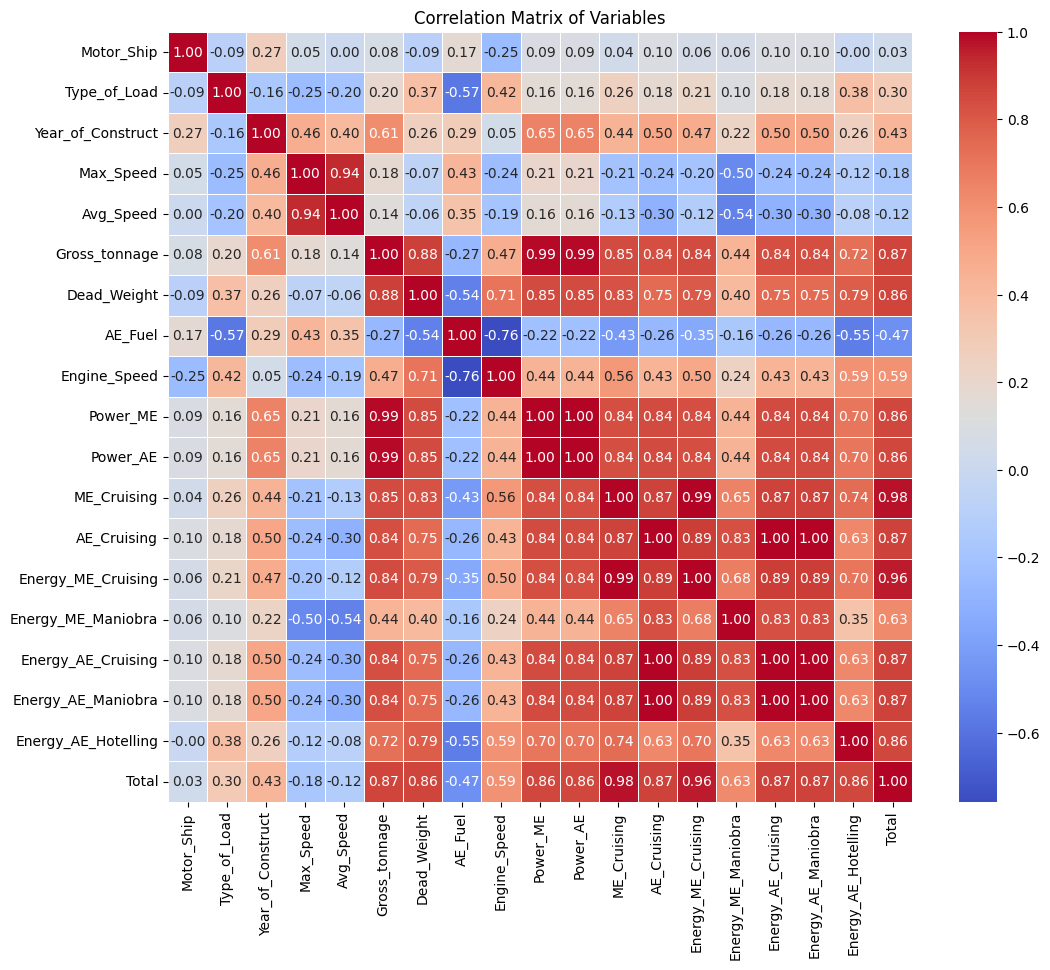

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr_matrix = df[['Motor_Ship','Type_of_Load','Year_of_Construct','Max_Speed','Avg_Speed','Gross_tonnage','Dead_Weight','AE_Fuel','Engine_Speed','Power_ME','Power_AE','ME_Cruising','AE_Cruising', 'Energy_ME_Cruising','Energy_ME_Maniobra','Energy_AE_Cruising','Energy_AE_Maniobra','Energy_AE_Hotelling','Total']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of Variables")
plt.show()

## Feature Selection

In [17]:
df = df.drop([
 'Motor_Ship.1'
,'Docking_Day','Docking_Time'
#, 'A_ME'
#, 'Avg_Speed', 'Max_Speed'
#, 'Year_of_Construct'
,'Sailing_Day','Departure_Time'
,'Permanence'
,'T_min_Hotell_Formato','T_min_Hotell'
,'Caldera_Maniobra','Caldera_Hotelling'
,'Subtotal_NoCald'
,'ME_Cruising'
, 'AE_Cruising'
,'ME_Maniobra',	'AE_Maniobra',	'AE_Hotelling'
,'LF_ME_Cruising','LF_ME_Maniobra'
,'Energy_ME_Cruising'
,'Energy_ME_Maniobra'
,'Energy_AE_Cruising','Energy_AE_Maniobra'
,'Energy_AE_Hotelling'
,'Power_ME'
,'Power_AE'
],axis=1)

In [18]:
df.head()

,Motor_Ship,Type_of_Load,Year_of_Construct,Max_Speed,Avg_Speed,Gross_tonnage,Dead_Weight,EM_Fuel,AE_Fuel,Engine_Speed,A_ME,Total
0,43,1,2007.0,20.6,18.1,22914,28142.0,0,1,1,1,37691.78854
1,91,1,2008.0,20.2,19.1,18327,23388.0,0,1,1,1,101350.81510
2,95,1,2007.0,15.7,14.6,9996,11828.0,0,1,1,1,68124.22588
3,216,3,2014.0,13.0,11.9,34794,61442.0,0,0,2,1,121196.81390
4,118,1,2010.0,11.8,10.7,17280,21446.0,0,1,1,1,132879.56670


In [19]:
df.Motor_Ship.unique().sum()

27730

In [20]:
df.isna().sum()

Motor_Ship           0
Type_of_Load         0
Year_of_Construct    0
Max_Speed            0
Avg_Speed            0
Gross_tonnage        0
Dead_Weight          0
EM_Fuel              0
AE_Fuel              0
Engine_Speed         0
A_ME                 0
Total                0
dtype: int64

## Splitting Data into Training and Test

In [21]:
target_col = "Total"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2022)

# Model Training

## Linear regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error


# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [24]:
y_prediction = pd.Series(lr_model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_prediction], axis=1)
z.columns = ['True', 'Prediction']
z.head(200)

,True,Prediction
0,103722.37790,109761.495260
1,65972.93437,52126.563426
2,70923.05161,55964.220151
3,68013.76148,52009.629127
4,69737.17690,59547.395459
...,...,...
158,81071.82545,76355.071693
159,709910.45460,420111.919024
160,115489.28340,136034.702527
161,197131.12860,204438.188803


In [25]:
# Evaluation

print("Linear Regression - MSE:", mean_squared_error(y_test, y_prediction))
print("Linear Regression - MAE:",mean_absolute_error(y_test, y_prediction))
print("Linear Regression - R^2:", r2_score(y_test, y_prediction))
print("Linear Regression - Explained Variance:",explained_variance_score(y_test, y_prediction))

Linear Regression - MSE: 1094740295.0344963
Linear Regression - MAE: 18430.01346943568
Linear Regression - R^2: 0.9278551939210671
Linear Regression - Explained Variance: 0.9280676553832699


## Polynomial Regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Defining the degree of the polynomial to fit
degree = 2

# Creating a pipeline that first transforms the features into polynomial features, then fits a linear regression model
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Training the model
poly_model.fit(X_train, y_train)

# Predictions
y_pred_poly = poly_model.predict(X_test)

# Evaluation
print("Polynomial Regression (degree {}) - MSE:".format(degree), mean_squared_error(y_test, y_pred_poly))
print("Polynomial Regression (degree {}) - R^2:".format(degree), r2_score(y_test, y_pred_poly))
print("Polynomial Regression (degree {}) - MAE:".format(degree),mean_absolute_error(y_test, y_pred_poly))
print("Polynomial Regression (degree {}) - Explained Variance:".format(degree),explained_variance_score(y_test, y_pred_poly))


Polynomial Regression (degree 2) - MSE: 494494792.8207827
Polynomial Regression (degree 2) - R^2: 0.9674121514509765
Polynomial Regression (degree 2) - MAE: 12221.707212709402
Polynomial Regression (degree 2) - Explained Variance: 0.96743949803326


### Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

# Defining the polynomial regression model within a pipeline
poly_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())

# Performing 5-fold cross-validation and compute the R-squared scores
cv_scores = cross_val_score(poly_pipeline, X, y, cv=5, scoring='r2')

print("5-Fold CV R-squared scores:", cv_scores)
print("Average R-squared:", np.mean(cv_scores))


5-Fold CV R-squared scores: [0.90534477 0.61209267 0.95505172 0.97517622 0.08964594]
Average R-squared: 0.707462266345909


## Multiple Linear Regression with Interaction Effects

In [29]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop('Total', axis=1)  # Assuming 'Total' is the target variable
y = df['Total']



# Creating a pipeline that includes interaction terms, scales the features, and applies linear regression
interaction_model = make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=True, include_bias=False),
    StandardScaler(),
    LinearRegression()
)

# Fiting the model
interaction_model.fit(X_train, y_train)

# Predictions
y_pred_interaction = interaction_model.predict(X_test)

# Evaluation
mse_interaction = mean_squared_error(y_test, y_pred_interaction)
r2_interaction = r2_score(y_test, y_pred_interaction)
mae_interaction = mean_absolute_error(y_test, y_pred_interaction)
explained_variance_score_interaction = explained_variance_score(y_test, y_pred_interaction)

print("Multiple Linear Regression with Interaction Effects - MSE:", mse_interaction)
print("Multiple Linear Regression with Interaction Effects - R^2:", r2_interaction)
print("Multiple Linear Regression with Interaction Effects - MAE:", mae_interaction)
print("Multiple Linear Regression with Interaction Effects - Explained Variance:", explained_variance_score_interaction)

Multiple Linear Regression with Interaction Effects - MSE: 548607161.9537078
Multiple Linear Regression with Interaction Effects - R^2: 0.9638460761039066
Multiple Linear Regression with Interaction Effects - MAE: 12896.290513915432
Multiple Linear Regression with Interaction Effects - Explained Variance: 0.963881822093663


## Ridge Regression

In [32]:
from sklearn.linear_model import RidgeCV


# Defining a range of alpha values for testing
alpha_values = [1e-3, 1e-2, 1e-1, 1, 10, 100]

# Creating a RidgeCV model instance with specified alphas and cross-validation
ridge_cv = make_pipeline(
    PolynomialFeatures(degree=degree),
    StandardScaler(),
    RidgeCV(alphas=alpha_values, cv=5, scoring='neg_mean_squared_error')
)

# Fiting the model
ridge_cv.fit(X_train, y_train)

# Best alpha value
print("Optimal alpha:", ridge_cv.named_steps['ridgecv'].alpha_)

# Evaluating the model using the best alpha value
y_pred_ridge_cv = ridge_cv.predict(X_test)
print("Optimized Ridge Regression - MSE:", mean_squared_error(y_test, y_pred_ridge_cv))
print("Optimized Ridge Regression - R^2:", r2_score(y_test, y_pred_ridge_cv))
print("Optimized Ridge Regression - MAE:",mean_absolute_error(y_test, y_pred_ridge_cv))
print("Optimized Ridge Regression - Explained Variance:",explained_variance_score(y_test, y_pred_ridge_cv))

Optimal alpha: 0.1
Optimized Ridge Regression - MSE: 476888724.11457396
Optimized Ridge Regression - R^2: 0.9685724142259772
Optimized Ridge Regression - MAE: 11822.403863341033
Optimized Ridge Regression - Explained Variance: 0.9686470259988291


In [34]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Defining a scorer dictionary that includes both R-squared and MSE
scoring = {'r2': 'r2', 'MSE': make_scorer(mean_squared_error, greater_is_better=False)}

# Defining the alpha values to explore during RidgeCV's internal cross-validation
alpha_values = [1e-3, 1e-2, 1e-1, 1, 10, 100]

# Define a pipeline for Ridge with Polynomial Features
ridge_poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('ridge', RidgeCV(alphas=alpha_values, cv=5, scoring='neg_mean_squared_error'))
])

# Performing extended cross-validation and request multiple scoring metrics
cv_results_ridge = cross_validate(ridge_poly_pipeline, X, y, cv=5, scoring=scoring, return_train_score=True)

# Printing the cross-validation results
print("Cross-validation scores for Ridge Regression:")
print("R-squared scores:", cv_results_ridge['test_r2'])
print("Mean R-squared:", np.mean(cv_results_ridge['test_r2']))
print("MSE scores:", cv_results_ridge['test_MSE'])
print("Mean MSE:", np.mean(cv_results_ridge['test_MSE']))

# Assessing model stability
print("Standard deviation of R-squared scores:", np.std(cv_results_ridge['test_r2']))
print("Standard deviation of MSE scores:", np.std(cv_results_ridge['test_MSE']))


Cross-validation scores for Ridge Regression:
R-squared scores: [0.9125415  0.96133675 0.95278269 0.97690583 0.94368997]
Mean R-squared: 0.9494513471750349
MSE scores: [-8.59480158e+08 -7.31376989e+08 -5.98310604e+08 -2.50479084e+08
 -8.06554099e+08]
Mean MSE: -649240186.869065
Standard deviation of R-squared scores: 0.021455253674948334
Standard deviation of MSE scores: 217852797.49633273


## XG Boost

In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Defining the XGBRegressor model
xgb_model = XGBRegressor(random_state=2022)

# Defining a grid of hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fiting GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

# Predicting and evaluating using the best estimator
y_pred_xgb = grid_search.best_estimator_.predict(X_test)
print("XGB Regressor - MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGB Regressor - R^2:", r2_score(y_test, y_pred_xgb))
print("XGB Regressor - MAE:",mean_absolute_error(y_test, y_pred_xgb))
print("XGB Regressor - Explained Variance:",explained_variance_score(y_test, y_pred_xgb))

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score (MSE): 1024907560.4116147
XGB Regressor - MSE: 616542545.9655833
XGB Regressor - R^2: 0.9593690461382927
XGB Regressor - MAE: 11774.465148673313
XGB Regressor - Explained Variance: 0.959385951460764


# Model Selection

<ipython-input-36-62983f5a317a>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(performance_df['Model'], rotation=45, ha='right')
<ipython-input-36-62983f5a317a>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(performance_df['Model'], rotation=45, ha='right')
<ipython-input-36-62983f5a317a>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(performance_df['Model'], rotation=45, ha='right')
<ipython-input-36-62983f5a317a>:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(performance_df['Model'], rotation=45, ha='right')


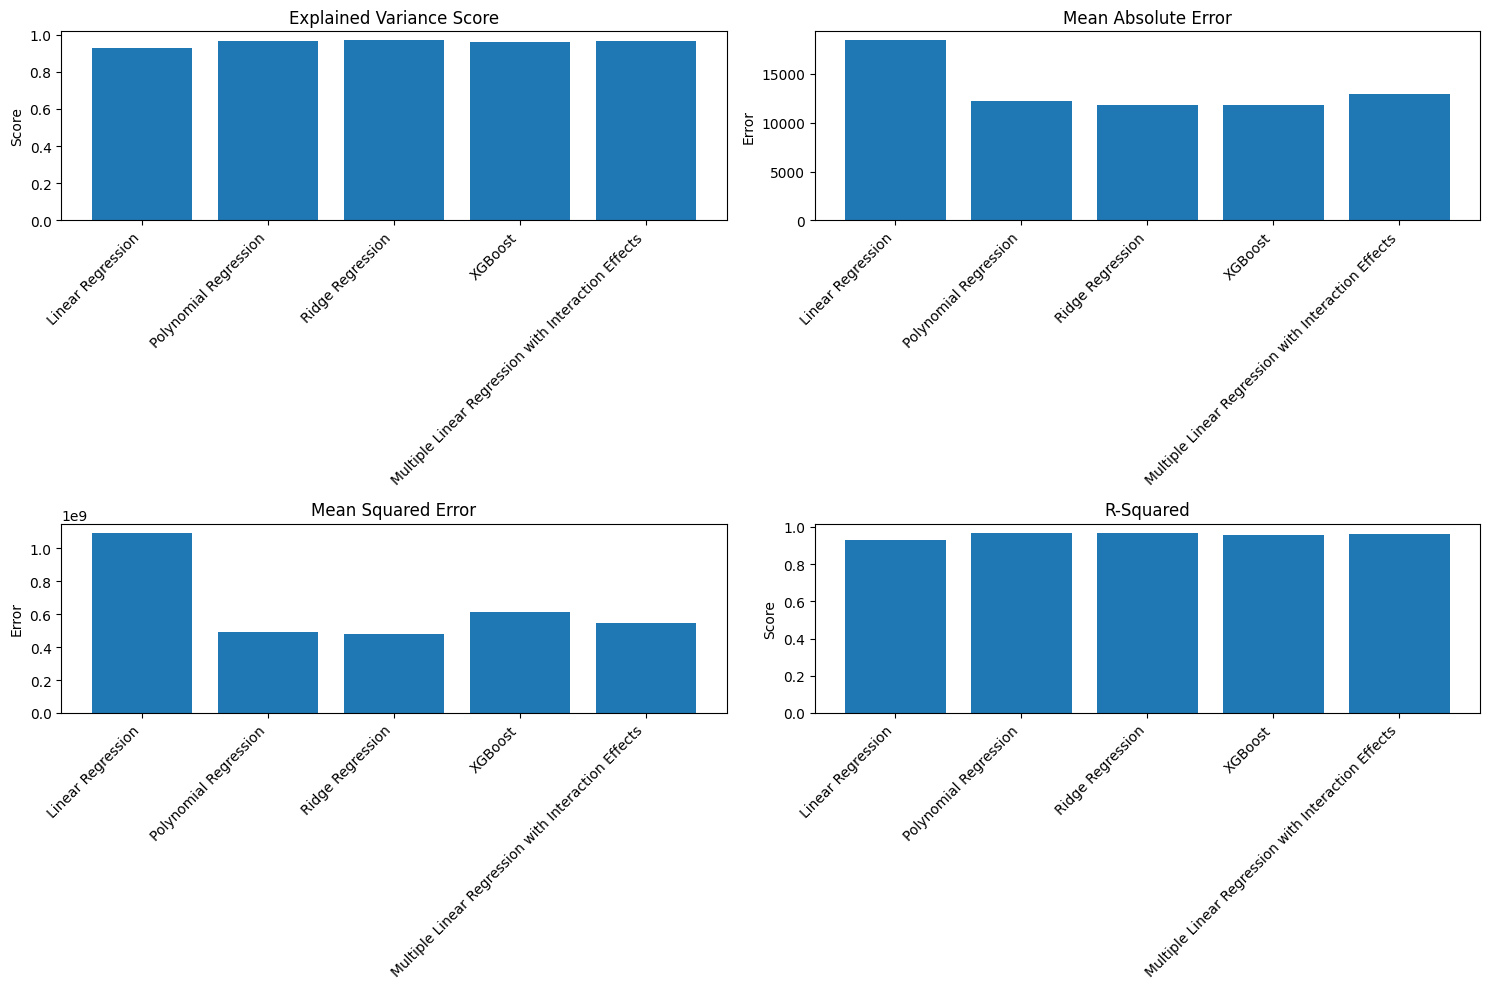

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Summary table of model performance metrics
model_performance = {
    'Model': ['Linear Regression','Polynomial Regression','Ridge Regression', 'XGBoost', 'Multiple Linear Regression with Interaction Effects', ],
    'Explained Variance Score': [
        explained_variance_score(y_test, y_prediction),
        explained_variance_score(y_test, y_pred_poly),
        explained_variance_score(y_test, y_pred_ridge_cv),
        explained_variance_score(y_test, y_pred_xgb),
        explained_variance_score(y_test, y_pred_interaction),

    ],
    'Mean Absolute Error': [
        mean_absolute_error(y_test, y_prediction),
        mean_absolute_error(y_test, y_pred_poly),
        mean_absolute_error(y_test, y_pred_ridge_cv),
        mean_absolute_error(y_test, y_pred_xgb),
        mean_absolute_error(y_test, y_pred_interaction),

    ],
    'Mean Squared Error': [
        mean_squared_error(y_test, y_prediction),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_ridge_cv),
        mean_squared_error(y_test, y_pred_xgb),
        mean_squared_error(y_test, y_pred_interaction),

    ],
    'R-Squared': [
        r2_score(y_test, y_prediction),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_ridge_cv),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_interaction),

    ]
}

performance_df = pd.DataFrame(model_performance)

# Visualizing the performance metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Explained Variance Score
axes[0, 0].bar(performance_df['Model'], performance_df['Explained Variance Score'])
axes[0, 0].set_title('Explained Variance Score')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_xticklabels(performance_df['Model'], rotation=45, ha='right')

# Mean Absolute Error
axes[0, 1].bar(performance_df['Model'], performance_df['Mean Absolute Error'])
axes[0, 1].set_title('Mean Absolute Error')
axes[0, 1].set_ylabel('Error')
axes[0, 1].set_xticklabels(performance_df['Model'], rotation=45, ha='right')

# Mean Squared Error
axes[1, 0].bar(performance_df['Model'], performance_df['Mean Squared Error'])
axes[1, 0].set_title('Mean Squared Error')
axes[1, 0].set_ylabel('Error')
axes[1, 0].set_xticklabels(performance_df['Model'], rotation=45, ha='right')

# R-Squared
axes[1, 1].bar(performance_df['Model'], performance_df['R-Squared'])
axes[1, 1].set_title('R-Squared')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xticklabels(performance_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [38]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import numpy as np
actual = y_test.reset_index(drop=True)  # Actual values
predictions = {

    'Linear Regression': lr_model.predict(X_test),
    'Polynomial Regression': poly_model.predict(X_test),
    'Ridge Regression': ridge_cv.predict(X_test),
    'XGBoost': grid_search.best_estimator_.predict(X_test),
    'Multiple Linear Regression with Interaction Effects': interaction_model.predict(X_test),


}

def calculate_performance(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    explained_variance = explained_variance_score(actual, predicted)
    return mse, rmse, r2, explained_variance


for model_name, model_predictions in predictions.items():
    mse, rmse, r2, explained_variance = calculate_performance(actual, model_predictions)
    print(f"{model_name} - Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Explained Variance Score: {explained_variance:.4f}\n")


Linear Regression - Performance Metrics:
Mean Squared Error (MSE): 1094740295.03
Root Mean Squared Error (RMSE): 33086.86
R-squared (R²): 0.9279
Explained Variance Score: 0.9281

Polynomial Regression - Performance Metrics:
Mean Squared Error (MSE): 494494792.82
Root Mean Squared Error (RMSE): 22237.24
R-squared (R²): 0.9674
Explained Variance Score: 0.9674

Ridge Regression - Performance Metrics:
Mean Squared Error (MSE): 476888724.11
Root Mean Squared Error (RMSE): 21837.78
R-squared (R²): 0.9686
Explained Variance Score: 0.9686

XGBoost - Performance Metrics:
Mean Squared Error (MSE): 616542545.97
Root Mean Squared Error (RMSE): 24830.27
R-squared (R²): 0.9594
Explained Variance Score: 0.9594

Multiple Linear Regression with Interaction Effects - Performance Metrics:
Mean Squared Error (MSE): 548607161.95
Root Mean Squared Error (RMSE): 23422.36
R-squared (R²): 0.9638
Explained Variance Score: 0.9639



In [40]:
# Sorting the performance dataframe by R-Squared in descending order
sorted_performance_df = performance_df.sort_values(by='R-Squared', ascending=False)

# Selecting the top model
best_model = sorted_performance_df.iloc[0]

print(f"The best model is {best_model['Model']} with an R-Squared score of {best_model['R-Squared']:.3f}.")


The best model is Ridge Regression with an R-Squared score of 0.969.


In [41]:
# Selecting the second best model
second_best_model = sorted_performance_df.iloc[1]

print(f"The second best model is {second_best_model['Model']} with an R-Squared score of {second_best_model['R-Squared']:.3f}.")


The second best model is Polynomial Regression with an R-Squared score of 0.967.


In [42]:
# Selecting the third best model
Third_best_model = sorted_performance_df.iloc[2]

print(f"The Third best model is {Third_best_model['Model']} with an R-Squared score of {Third_best_model['R-Squared']:.3f}.")


The Third best model is Multiple Linear Regression with Interaction Effects with an R-Squared score of 0.964.
